In [1]:
from pyspark.sql import SparkSession
import os 
spark = SparkSession.builder.appName("name02").getOrCreate()
import pyspark.sql.functions as F 

24/05/20 08:27:39 WARN Utils: Your hostname, msi-MAG resolves to a loopback address: 127.0.1.1; using 192.168.0.129 instead (on interface wlp3s0)
24/05/20 08:27:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/20 08:27:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Joins

| Type                  | Description                                                                                 |
|-----------------------|---------------------------------------------------------------------------------------------|
| Inner join (a.k.a. equi-join)  | Return rows from both datasets when the join expression evaluates to true.                       |
| Left outer join       | Return rows from the left dataset even when the join expression evaluates as false.          |
| Right outer join      | Return rows from the right dataset even when the join expression evaluates as false.         |
| Outer join            | Return rows from both datasets even when the join expression evaluates as false.             |
| Left anti-join        | Return rows only from the left dataset when the join expression evaluates as false.          |
| Left semi-join        | Return rows only from the left dataset when the join expression evaluates to true.           |
| Cross (a.k.a. Cartesian) | Return rows by combining each row from the left dataset with each row in the right dataset. The number of rows is a product of the size of each dataset. |


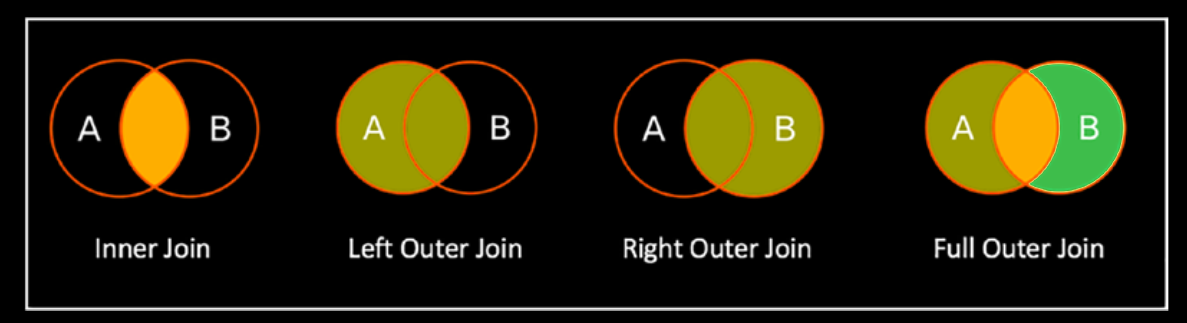

creating 2 tables

In [2]:
schema_employee = "`first_name` String, `dept_no` INT"

employeeDF = spark.createDataFrame(
                                (("John", 31),\
                                ("Jeff", 33),\
                                ("Mary", 33),\
                                ("Mandy", 34),\
                                ("Julie", 34),\
                                ("Kurt", None)), schema=schema_employee)


In [3]:
schema_employer = "`id` INT, `name` String"
deptDF = spark.createDataFrame( 
    ((31, "Sales"),
    (33, "Engineering"),
    (34, "Finance"),
    (35, "Marketing")), schema=schema_employer)


pass the DFs to Tables

In [4]:
employeeDF.createOrReplaceTempView("employees")
deptDF.createOrReplaceTempView("departments")

## Spark SQL way

In [5]:
spark.sql("select * from employees JOIN departments on dept_no == id").show()

+----------+-------+---+-----------+
|first_name|dept_no| id|       name|
+----------+-------+---+-----------+
|      John|     31| 31|      Sales|
|      Jeff|     33| 33|Engineering|
|      Mary|     33| 33|Engineering|
|     Mandy|     34| 34|    Finance|
|     Julie|     34| 34|    Finance|
+----------+-------+---+-----------+



In [12]:
spark.sql("select * from employees LEFT JOIN departments on dept_no == id").show()

+----------+-------+----+-----------+
|first_name|dept_no|  id|       name|
+----------+-------+----+-----------+
|      John|     31|  31|      Sales|
|      Jeff|     33|  33|Engineering|
|      Mary|     33|  33|Engineering|
|     Mandy|     34|  34|    Finance|
|     Julie|     34|  34|    Finance|
|      Kurt|   null|null|       null|
+----------+-------+----+-----------+



In [13]:
spark.sql("select * from employees RIGHT JOIN departments on dept_no == id").show()

+----------+-------+---+-----------+
|first_name|dept_no| id|       name|
+----------+-------+---+-----------+
|      John|     31| 31|      Sales|
|      Mary|     33| 33|Engineering|
|      Jeff|     33| 33|Engineering|
|     Julie|     34| 34|    Finance|
|     Mandy|     34| 34|    Finance|
|      null|   null| 35|  Marketing|
+----------+-------+---+-----------+



In [15]:
spark.sql("select * from employees FULL OUTER JOIN departments on dept_no == id").show()

+----------+-------+----+-----------+
|first_name|dept_no|  id|       name|
+----------+-------+----+-----------+
|      Kurt|   null|null|       null|
|      John|     31|  31|      Sales|
|      Jeff|     33|  33|Engineering|
|      Mary|     33|  33|Engineering|
|     Mandy|     34|  34|    Finance|
|     Julie|     34|  34|    Finance|
|      null|   null|  35|  Marketing|
+----------+-------+----+-----------+



## The DF way

In [8]:
# perform the join (inner is default, you can omit it)
# you can access the columns using dot notation <<<<<<<<<<<<<<<<<<<<<<
employeeDF.join(deptDF, employeeDF.dept_no == deptDF.id, "inner").show()



+----------+-------+---+-----------+
|first_name|dept_no| id|       name|
+----------+-------+---+-----------+
|      John|     31| 31|      Sales|
|      Jeff|     33| 33|Engineering|
|      Mary|     33| 33|Engineering|
|     Mandy|     34| 34|    Finance|
|     Julie|     34| 34|    Finance|
+----------+-------+---+-----------+



In [9]:
employeeDF.join(deptDF, employeeDF.dept_no == deptDF.id, "left").show()

+----------+-------+----+-----------+
|first_name|dept_no|  id|       name|
+----------+-------+----+-----------+
|      John|     31|  31|      Sales|
|      Jeff|     33|  33|Engineering|
|      Mary|     33|  33|Engineering|
|     Mandy|     34|  34|    Finance|
|     Julie|     34|  34|    Finance|
|      Kurt|   null|null|       null|
+----------+-------+----+-----------+



In [10]:
employeeDF.join(deptDF, employeeDF.dept_no == deptDF.id, "right").show()

+----------+-------+---+-----------+
|first_name|dept_no| id|       name|
+----------+-------+---+-----------+
|      John|     31| 31|      Sales|
|      Mary|     33| 33|Engineering|
|      Jeff|     33| 33|Engineering|
|     Julie|     34| 34|    Finance|
|     Mandy|     34| 34|    Finance|
|      null|   null| 35|  Marketing|
+----------+-------+---+-----------+



In [11]:
employeeDF.join(deptDF, employeeDF.dept_no == deptDF.id, "outer").show()

+----------+-------+----+-----------+
|first_name|dept_no|  id|       name|
+----------+-------+----+-----------+
|      Kurt|   null|null|       null|
|      John|     31|  31|      Sales|
|      Jeff|     33|  33|Engineering|
|      Mary|     33|  33|Engineering|
|     Mandy|     34|  34|    Finance|
|     Julie|     34|  34|    Finance|
|      null|   null|  35|  Marketing|
+----------+-------+----+-----------+



## AntiJoins
* `left_anti`: This join type lets you find out which rows from the left dataset don’t have any matching rows on the right dataset, and the joined dataset contains only the columns from the left dataset.
* `right_anti`: Does not exist

In [16]:
employeeDF.join(deptDF, employeeDF.dept_no == deptDF.id, "left_anti").show()

+----------+-------+
|first_name|dept_no|
+----------+-------+
|      Kurt|   null|
+----------+-------+



## Semi Join
Also only left sided
* `left_semi`: is a INNER JOIN, but only the columns from the left table are returned. *Is a quick way to filter* a table based on the rows from another
> return only the rows matching this table

In [18]:
employeeDF.join(deptDF, employeeDF.dept_no == deptDF.id, "left_semi").show()

+----------+-------+
|first_name|dept_no|
+----------+-------+
|      John|     31|
|      Jeff|     33|
|      Mary|     33|
|     Mandy|     34|
|     Julie|     34|
+----------+-------+



## Cross (a.k.a. Cartesian)
Append to every row of A all the rows from B 
> **case A=1 row, B=5 rows** all 5 rows from B are appended to A1 (if a has more rows extend the concept)

In [20]:
spark.sql("SELECT * FROM departments").show()

+---+-----------+
| id|       name|
+---+-----------+
| 31|      Sales|
| 33|Engineering|
| 34|    Finance|
| 35|  Marketing|
+---+-----------+



for every row in A, 4 columns will be appended

In [21]:
spark.sql("select * from employees CROSS JOIN departments").show(8)

+----------+-------+---+-----------+
|first_name|dept_no| id|       name|
+----------+-------+---+-----------+
|      John|     31| 31|      Sales|
|      John|     31| 33|Engineering|
|      John|     31| 34|    Finance|
|      John|     31| 35|  Marketing|
|      Jeff|     33| 31|      Sales|
|      Jeff|     33| 33|Engineering|
|      Jeff|     33| 34|    Finance|
|      Jeff|     33| 35|  Marketing|
+----------+-------+---+-----------+
only showing top 8 rows



In [40]:
employeeDF.crossJoin(deptDF).show(8)

+----------+-------+---+-----------+
|first_name|dept_no| id|       name|
+----------+-------+---+-----------+
|      John|     31| 31|      Sales|
|      John|     31| 33|Engineering|
|      John|     31| 34|    Finance|
|      John|     31| 35|  Marketing|
|      Jeff|     33| 31|      Sales|
|      Jeff|     33| 33|Engineering|
|      Jeff|     33| 34|    Finance|
|      Jeff|     33| 35|  Marketing|
+----------+-------+---+-----------+
only showing top 8 rows



## Self Join
Join the table to itself

In [22]:
# need for a more complex
emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

in df mode this... is too messy, why this `F.col()`? look at the next seccion *Dealing with duplicate column names*

In [36]:
empDF.alias("emp1")\
  .join(empDF.alias("emp2"), F.col("emp1.superior_emp_id") == F.col("emp2.emp_id"),"inner") \
  .select(F.col("emp1.emp_id"),F.col("emp1.name"), 
    F.col("emp2.emp_id").alias("superior_emp_id"), 
    F.col("emp2.name").alias("superior_emp_name")).show(truncate=False)

+------+--------+---------------+-----------------+
|emp_id|name    |superior_emp_id|superior_emp_name|
+------+--------+---------------+-----------------+
|2     |Rose    |1              |Smith            |
|3     |Williams|1              |Smith            |
|4     |Jones   |2              |Rose             |
|5     |Brown   |2              |Rose             |
|6     |Brown   |2              |Rose             |
+------+--------+---------------+-----------------+



In [32]:
empDF.createOrReplaceTempView("EMP")
spark.sql("SELECT * FROM EMP").show()

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|    name|superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|     1|   Smith|             -1|       2018|         10|     M|  3000|
|     2|    Rose|              1|       2010|         20|     M|  4000|
|     3|Williams|              1|       2010|         10|     M|  1000|
|     4|   Jones|              2|       2005|         10|     F|  2000|
|     5|   Brown|              2|       2010|         40|      |    -1|
|     6|   Brown|              2|       2010|         50|      |    -1|
+------+--------+---------------+-----------+-----------+------+------+



In [35]:
sql_ = """
SELECT emp1.emp_id, emp1.name, emp1.superior_emp_id, emp2.name
FROM EMP as emp1
LEFT JOIN EMP as emp2 ON emp1.superior_emp_id = emp2.emp_id
""" 

spark.sql(sql_).show()

+------+--------+---------------+-----+
|emp_id|    name|superior_emp_id| name|
+------+--------+---------------+-----+
|     1|   Smith|             -1| null|
|     2|    Rose|              1|Smith|
|     3|Williams|              1|Smith|
|     4|   Jones|              2| Rose|
|     5|   Brown|              2| Rose|
|     6|   Brown|              2| Rose|
+------+--------+---------------+-----+



## Dealing with duplicate column names
 Before joining them, it is best to rename those columns in one of the two
DataFrames to avoid access ambiguity issues; otherwise, the joined DataFrame would
have multiple columns with the same name. use `withColumnRenamed`